# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 0 - Knowledge Test - Predict Lending Club Defaulters



**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors**: Pavlos Protopapas, Mark Glickman

<hr style="height:2pt">

In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- **This is an individual HW, meant to test your knowledge of CS109a material. It will not be graded BUT you need to turn it in through Canvas.** 

<hr style="height:2pt">

![Lending club](https://blog.lendingclub.com/wp-content/uploads/2017/05/LC-Logo-Official-min.png)


### Overview 

[Lending Club](https://en.wikipedia.org/wiki/Lending_Club) is the world's largest peer-to-peer lending platform. The company claims that \\$15.98 billion in loans had been originated through its platform up to December 31, 2015.  Lending Club enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The dataset for this homework is derived from the full version of [Loan Data](https://www.lendingclub.com/info/download-data.action). Loans are for period Q3-2014, Q4-2015 and Q1-2015. We have done some preprocessing for you. 

Data dictionary is available for your reference in data folder. Please note that purpose and verification status have been one-hot-encoded, see data dictionary. 

### Use only the libraries below:

In [3]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm #Linear Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score

from keras.callbacks import EarlyStopping, ModelCheckpoint


import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout # create layers

from sklearn.ensemble import BaggingClassifier


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



<hr style="height:2pt">

### Problem 1 - Data Exploration

**1.1 The dataset is large so we provide it to you as a zip file. Unzip the file and load the dataset from the csv file `data/loans_cs109b.csv` into a pandas dataframe.**  

**Display `.shape()` and `.head()` of the dataframe. Which columns are categorical columns? Identify categorical columns programmatically and explain.**

**Your target column is `loan_status`. Is this a classification problem or a regression problem?**

In [46]:
# your code here
data = pd.read_csv('data/loans_cs109b.csv')

In [64]:
# your code here
display(data.shape)
display(data.head())
display(data.dtypes)

(190287, 87)

,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,url,title,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400,6.99%,A,A3,8.0,1,58000.0,0,114662,4,...,0,0,0,0,0,0,0,1,0,0
1,15000,12.39%,C,C1,10.0,3,78000.0,1,120463,6,...,0,0,0,0,0,0,0,0,1,0
2,7650,13.66%,C,C3,0.0,3,50000.0,0,117549,6,...,0,0,0,0,0,0,0,0,1,0
3,21425,15.59%,D,D1,6.0,3,63800.0,1,119764,4,...,0,0,0,0,0,0,0,0,1,0
4,9600,13.66%,C,C3,10.0,3,69000.0,1,119482,6,...,0,0,0,0,0,0,0,0,1,0


loan_amnt                        int64
int_rate                        object
grade                           object
sub_grade                       object
emp_length                     float64
home_ownership                   int64
annual_inc                     float64
loan_status                      int64
url                              int64
title                            int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                 int64
fico_range_low                   int64
fico_range_high                  int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status              int64
collections_12_mths_ex_me

*Your answer here*


**1.2 Create a plot showing distribution of target column.  Interpret your plot.**

(array([ 36699.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 153588.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

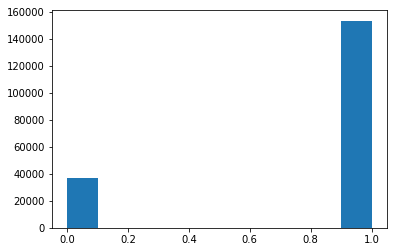

In [6]:
# your code here
plt.hist(data.loan_status)

*your answer here*


**1.3 Create a visualization showing `grade` and `loan_status`. Do the same for `sub_grade`. Interpret your plots.**

**Hint:**
*Your plot should be able to convey which grade (or subgrade) has highest (and least) number of defaulters. You may create a table or a heatmap.*


In [27]:
# your code here
data['count'] = 1
data_gb = data.groupby(by=['grade','loan_status'])
data_gb_df = pd.DataFrame(data_gb['count'].sum()).reset_index()
data_pivot = data_gb_df.pivot(index='grade', columns='loan_status', values='count')

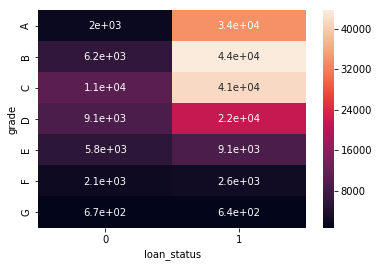

In [30]:
sns.heatmap(data_pivot, annot=True, robust=True)

*your answer here*


In [37]:
# your code here
data_gb = data.groupby(by=['sub_grade','loan_status'])
data_gb_df = pd.DataFrame(data_gb['count'].sum()).reset_index()
data_pivot = data_gb_df.pivot(index='sub_grade', columns='loan_status', values='count')

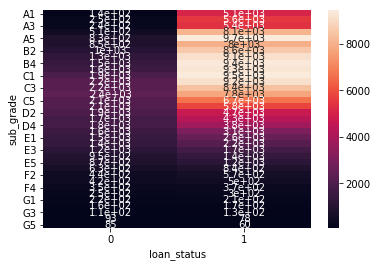

In [38]:
# your code here
sns.heatmap(data_pivot, annot=True, robust=True)

*your answer here*


**1.4 (a) Create a plot showing average debt to income ratio vs. grade**

**(b) Create a plot showing number of loans vs. loan purpose.**

**(c) Create a plot showing average interest rate vs grade. Interpret your plots.** 

*Hint: Look up the data dictionary*



Text(0,0.5,'Debt-to-Income Ratio')

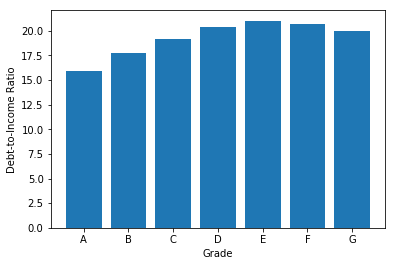

In [55]:
# your code here
data_gb = data.groupby(by=['grade'])
data_gb_df = pd.DataFrame(data_gb['dti'].mean()).reset_index()
plt.bar(x=data_gb_df['grade'], height=data_gb_df['dti'])
plt.xlabel('Grade')
plt.ylabel('Debt-to-Income Ratio')

In [75]:
data['int_rate'].to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

In [60]:
data_gb = data.groupby(by=['grade'])
data_gb_df = pd.DataFrame(data_gb['int_rate'].mean()).reset_index()
plt.bar(x=data_gb_df['grade'], height=data_gb_df['int_rate'])
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

DataError: No numeric types to aggregate

**1.5 (a) Check if all categorical columns identified in 1.1 are actually categorical. If not, make necessary changes.**

**(b) Convert to numeric `grade` and `sub_grade`.**

In [11]:
# your code here


In [12]:
# your code here


**1.6 Split the dataset into X_train, y_train, X_test, y_test, ratio 80:20, random_state = 109, stratify on `loan_status`.**

**Why do we want to strafity? Explain the choice of `loan status` and if you choose a different variable.**

**Check the ratio for y_train and y_test**

In [13]:
# your code here


### Problem 2: Building Models. We will be using log_loss as evaluation metric.

**2.1 Explain the difference between accuracy and log loss. (No code needed)**


*Your answer here*


**2.2 Fit a Linear Regression model on training data. Report log loss on `X_test`. What problems do you see in using Linear Regression for this problem ?**

In [14]:
# your code here


**2.3 Fit a Logisitc Regression model. Choose appropriate value of C. Set random_state=109. Report log loss on `X_test`.**

**Hints:**  <br/>
*You may set max_iter=1000* <br/>
*You may set solver = 'liblinear' to avoid warnings.* 

In [15]:
# your code here


**2.4 Fit a regularized model using `LogisticRegression()`. Set penalty = l2, random_state = 109.** 

**Report logloss on X_test.**

**Should you standardize your data before fitting regularized model ? Y/N and explain why.** 

**Hints:** <br/>
*You may set max_iter = 1000, C = 0.11*
<br/>
*You may set solver='liblinear' to avoid warnings.*


In [16]:
# your code here


**2.5 (a) Create Bagging Classifier and Random Forest Model.**
*For bagging classifier set n_estimators = 100 and random_state = 109*
*For Random Forest set n_estimators = 500 and random_state = 109.*
**Report logloss on X_test.**

**(b) Explain the difference between Bagging and Random Forest. (No code)**

**Hints:**
<br/>
*It took ~12 mins on a 16GB, quad core, old macbook to run Bagging Classifier.* <br/>
*It took ~6 mins on a 16GB, quad core, old macbook to run RandomForest Classifier.*

In [17]:
# your code here


In [18]:
# your code here


*your answer here*


**2.6 Create a NN Model. You may use following hints as starting point. Then change some of the hyperparameters and report your findings.** <br/>
**Should you standardize your data before fitting NN model ? Y/N and explain.**

Hints:

Nodes per Layer: 40, 30, 25, 20, 15, 10, 5, 1 [Total 7 layers + last layer] <br/> 
Activation function: reLU <br/>
Optimizer: Nadam (use the defaults; no other tuning) <br/>
Epochs: No more than 50 <br/>
Batch size: 256 <br/>
Validation_data = Same as previous models <br/>
<br/>
Choose appropriate loss function and activation function for last layer. <br/>

You may regularize, kernel_initializer = 'glorot_uniform' and/or Early stopping  and/or by adding dropout of 0.2 before the final layer. 


In [19]:
# your code here


### Problem 3: Model Comparison

**3.1 Create a table comparing all validation log losses you found above.**

**3.2 Which model did best ?**

**3.3 Would you invest your money based on these results? What could you improve?  (code optional)**

In [21]:
#your code here


*your answer here*


<hr style="height:2pt">